# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Adult Income Prediction Project Solution</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# <font color='green'> <b>Importing Libraries</b><font color='black'>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.preprocessing import OrdinalEncoder

plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='green'> <b>Loading The Dataset</b><font color='black'>

In [7]:
df0 = pd.read_csv("adult.csv")
df = df0.copy()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
19983,20,Private,219122,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
16164,36,Local-gov,116892,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
22357,23,Private,272185,Assoc-voc,11,Never-married,Craft-repair,Own-child,White,Male,0,0,33,United-States,<=50K
23100,28,Private,30771,Some-college,10,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
26774,37,Self-emp-inc,190759,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K


**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.

**Veri Seti Bilgisi:**

Bu veri seti UCI Machine Learning Repository'den alınmıştır. Bu problemin amacı, gelirlerine göre yetişkinleri iki farklı gruba ayırmaktır. Birinci grup 50.000 USD'den daha az geliri olanları, ikinci grup ise 50.000 USD veya daha fazla geliri olanları içermektedir. Elimizdeki veriler 1994 Nüfus Sayımı'ndan gelmektedir.

**Attribute Information:**

**Age**: Describes the age of individuals. Continuous.

**Yaş**: Bireylerin yaşını tanımlar. Sürekli (sayısal) değer.

**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**Çalışma Sınıfı**: Özel, Kendi İşi Olmayanlar, Kendi İşi Olanlar, Federal Hükümet, Yerel Hükümet, Eyalet Hükümeti, Ücret Almadan Çalışan, Hiç Çalışmamış.

**fnlwgt**: Continuous.

**fnlwgt**: Sürekli değer.Bu, ABD'deki Nüfus Sayım Bürosu tarafından oluşturulan bir ağırlıklandırma faktörüdür ve her veri girişinin gerçekte temsil ettiği kişi sayısını gösterir. Örneğin, bir veri girişi için fnlwgt değeri 100 olduğunda, bu veri girişinin 100 kişiyi temsil ettiği düşünülür.

Ancak, bu özellik genellikle analizlerde veya model eğitiminde doğrudan kullanılmaz çünkü bu ağırlıklar modeli eğitirken ya da test ederken bireysel veri noktaları üzerinde doğrudan bir anlama gelmez. Ancak, veri seti hakkında daha derinlemesine bir demografik analiz yapılıyorsa, bu ağırlık değerleri faydalı olabilir.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**Eğitim**: Lisans, Birtakım Kolejler, 11. Sınıf, Lise Mezunu, Meslek Okulu, Akademik Dernek, Mesleki Dernek, 9. Sınıf, 7-8. Sınıf, 12. Sınıf, Yüksek Lisans, 1-4. Sınıf, 10. Sınıf, Doktora, 5-6. Sınıf, Okul Öncesi.

**education-num**: Number of years spent in education. Continuous.

**Eğitim Numarası**: Eğitimde geçirilen yıl sayısı. Sürekli değer.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**Medeni Durum**: Medeni Evli, Boşanmış, Hiç Evlenmemiş, Ayrı, Dul, Eşinden Ayrı Evli, Askeri Evli.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**Meslek**: Teknik Destek, Zanaat-Tamir, Diğer Hizmetler, Satış, Yönetici, Profesyonel Uzmanlık, Temizlik Personeli, Makine Operatörü/Denetçi, İdari İşler, Tarım-Balıkçılık, Taşımacılık, Özel Ev Hizmetleri, Koruyucu Hizmetler, Silahlı Kuvvetler.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**İlişki Durumu**: Eş, Kendi Çocuğu, Koca, Aile İçinde Değil, Diğer Akraba, Bekar.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**Irk**: Beyaz, Asya-Pasifik Adalı, Amerikan Yerlisi-Eskimo, Diğer, Siyah.

**sex**: Female, Male.

**Cinsiyet**: Kadın, Erkek.

**capital-gain**: Bir bireyin varlık satışlarından (örneğin, hisse senedi veya gayrimenkul satışı) elde ettiği kazancı temsil eder. Continuous.

**Sermaye Kazancı**: Sürekli değer.

**capital-loss**: Bir bireyin varlık satışlarından (örneğin, hisse senedi veya gayrimenkul satışı) uğradığı zararı temsil eder. Continuous.

**Sermaye Kaybı**: Sürekli değer.

**hours-per-week**: Continuous.

**Haftalık Çalışma Saati**: Sürekli değer.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**Anavatan**: ABD, Kamboçya, İngiltere ...

**salary**: >50K,<=50K.

**Maaş**: >50K,<=50K.

# <font color='green'> <b>Exploratory Data Analysis (EDA)</b><font color='black'>

In [11]:
df.shape

(32561, 15)

In [12]:
df.columns = df.columns.str.replace(".", "_")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [13]:
# Checks for duplicate observations in the dataset and removes them if found

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep="first").sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep="first", inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [16]:
df.describe(include='object').T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native_country,32537,42,United-States,29153
income,32537,2,<=50K,24698


In [17]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32537  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ age              │   0 │     0 │   38.59 │   13.64 │     17 │      28 │     37 │     48 │      90 │ ▇▇▆▃▁  │  │
│ │ fnlwgt           │   0 │     0 │  189800 │  105600 │  12280 │  117800 │ 178400 │ 237000 │ 1485000 │   ▇▂   │  │
│ │ education_num    │   0 │     0 │   10.08 │   2.572 │      1 │       9 │     10 │     12 │      16 │  ▁▁▇▃▁ │  │
│ │ capital_gain     │   0 │     0 │    1078 │    7388 │      0 │       0 │      0 │      0 │  100000 │   ▇    │  │
│ │ capital_loss     │   0 │     0 │   87.37 │   403.1 │      0 │       0 │      0 │      0 │    4356 │   ▇    │  │
│ │ hours_per_week   │   0 │     0 │   40.44 │   12.35 │      1 │      40 │     40 │     45 │      99 │  ▁▂▇▂  │  │
│ └──────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ workclass                     │      0 │          0 │                           1 │                  32537 │  │
│ │ education                     │      0 │          0 │                           1 │                  32537 │  │
│ │ marital_status                │      0 │          0 │                           1 │                  32537 │  │
│ │ occupation                    │      0 │          0 │                           1 │                  32537 │  │
│ │ relationship                  │      0 │          0 │                           1 │                  32537 │  │
│ │ race                          │      0 │          0 │                           1 │                  32537 │  │
│ │ sex                           │      0 │          0 │                           1 │                  32537 │  │
│ │ native_country                │      0 │          0 │                           1 │                  32537 │  │
│ │ income                        │      0 │          0 │                           1 │                  32537 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## <font color='#4C8A2E'> <b>Object Columns</b><font color='black'>

### <font color='#72B054'> <b>"workclass" Column</b><font color='black'>

In [20]:
df.workclass.isnull().sum()

0

In [21]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

This column contains the value '**?**'. This value is actually NaN value. Let's convert this value from str dtype to nan dtype.

In [23]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [24]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [25]:
df.workclass.isnull().sum() # '?' values ​​have turned into NaN values. NaN values will be checked in NaN Values section.

1836

### <font color='#72B054'> <b>"education" Column</b><font color='black'>

In [27]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

This column seems OK for now.

### <font color='#72B054'> <b>"marital_status" Column</b><font color='black'>

In [30]:
df.marital_status.unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

This column seems OK for now.

### <font color='#72B054'> <b>"occupation" Column</b><font color='black'>

In [33]:
df.occupation.isnull().sum()

0

In [34]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

This column contains the value '**?**' too. This value is actually NaN value. Let's convert this value from str type to nan type.

In [36]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [37]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [38]:
df.occupation.isnull().sum() # '?' values ​​have turned into NaN values. NaN values will be checked in NaN Values section.

1843

### <font color='#72B054'> <b>"relationship" Column</b><font color='black'>

In [40]:
df.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

This column seems OK for now.

### <font color='#72B054'> <b>"race" Column</b><font color='black'>

In [43]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

This column seems OK for now.

### <font color='#72B054'> <b>"sex" Column</b><font color='black'>

In [46]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

This column seems OK for now.

### <font color='#72B054'> <b>"native_country" Column</b><font color='black'>

In [49]:
df.native_country.isnull().sum()

0

In [50]:
df.native_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

This column contains the value '**?**' too. This value is actually NaN value. Let's convert this value from str type to nan type.

In [52]:
df['native_country'] = df['native_country'].replace('?', np.nan)

In [53]:
df.native_country.value_counts()

native_country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [54]:
df.native_country.isnull().sum() # '?' values ​​have turned into NaN values. NaN values will be checked in NaN Values section.

582

### <font color='#72B054'> <b>"income" Column</b><font color='black'>

In [56]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

This column seems OK for now.

## <font color='#4C8A2E'> <b>Numeric Columns</b><font color='black'>

### <font color='#72B054'> <b>Checking Outliers</b><font color='black'>

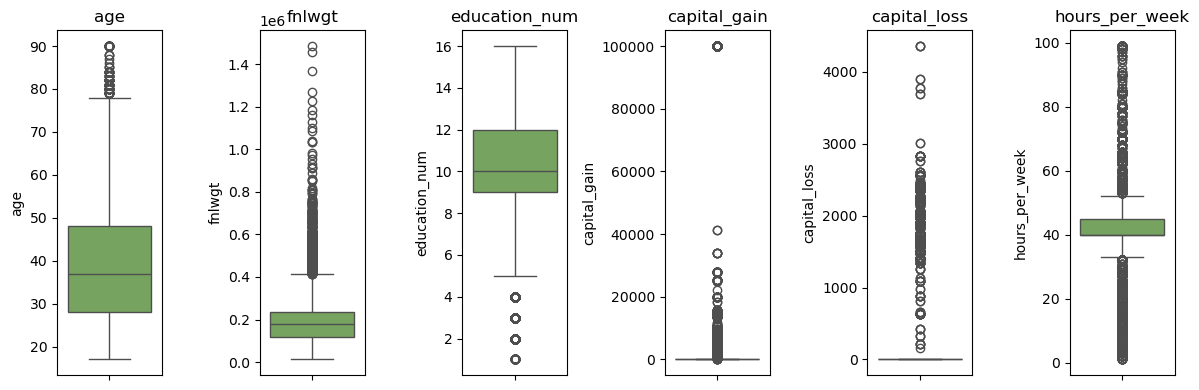

In [60]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;  
numeric_columns = df.select_dtypes(include=['number']).columns
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='#72B054')
    plt.title(col)

plt.tight_layout() 
plt.show()

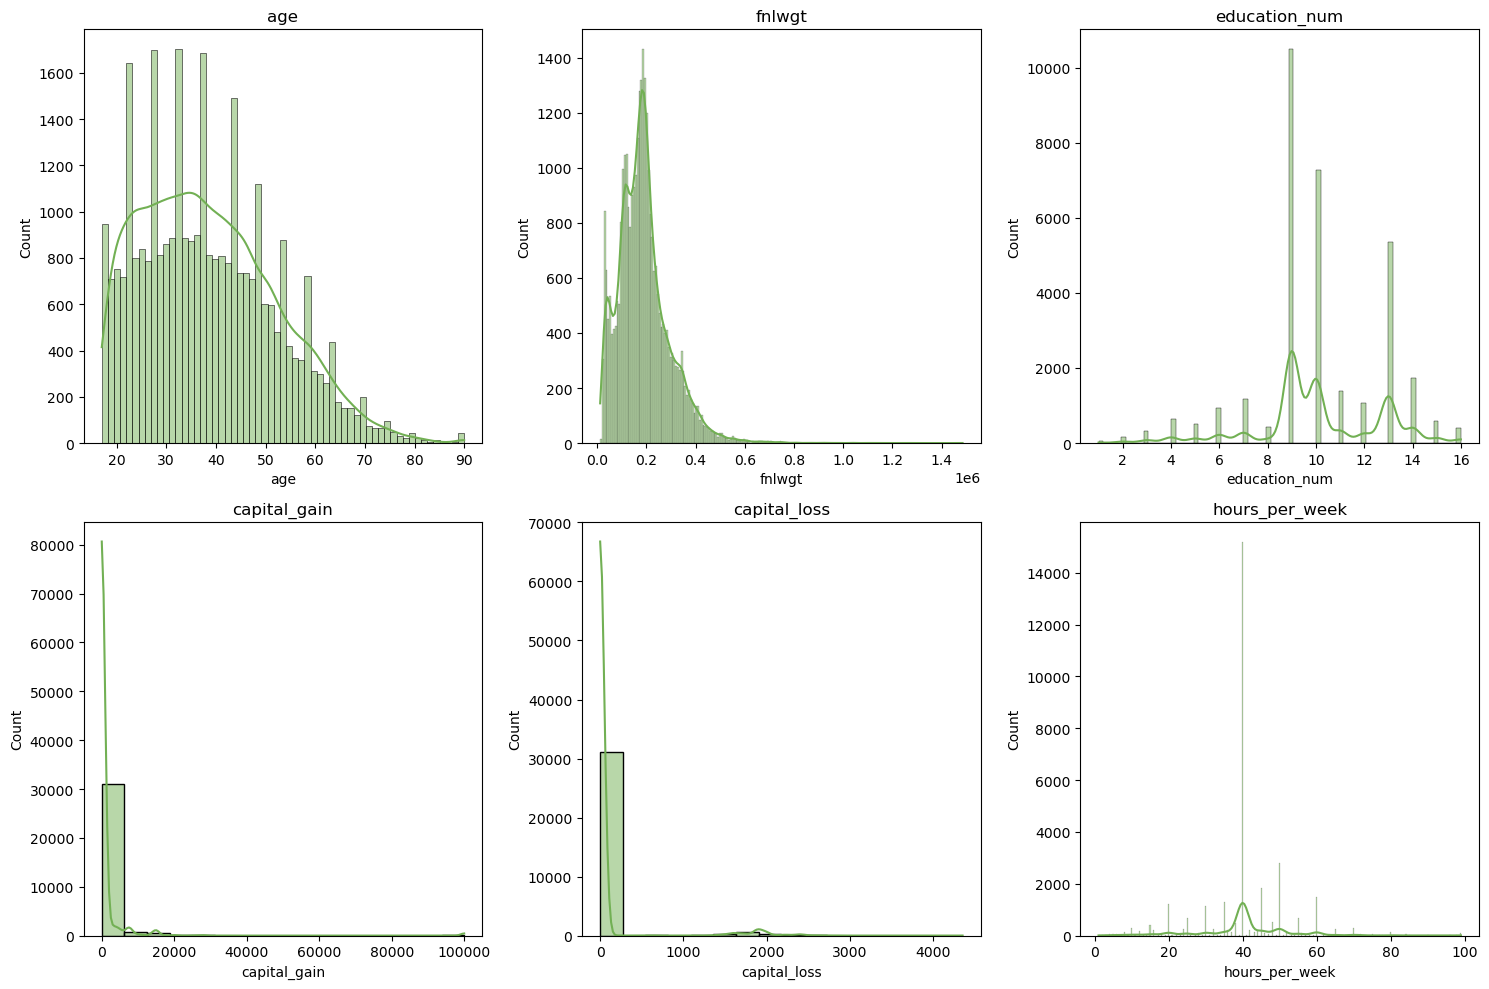

In [61]:
columns = numeric_columns
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='#72B054')
    axes[i].set_title(column)
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

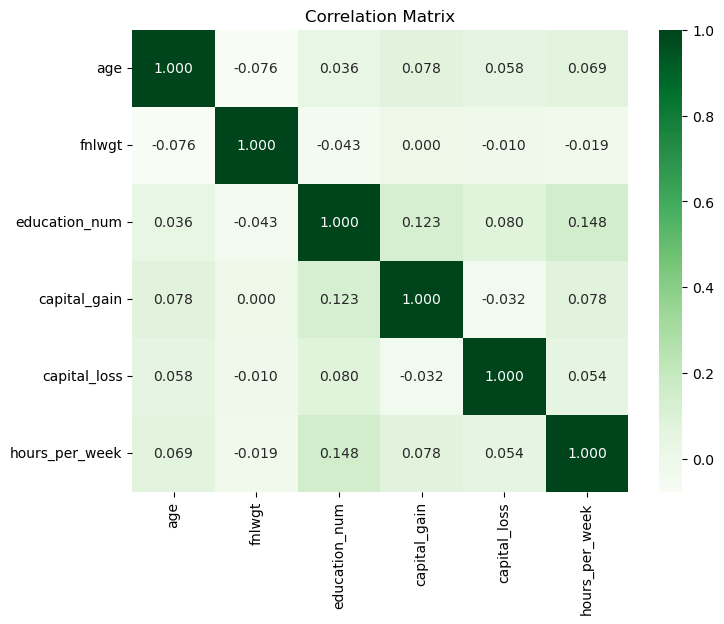

In [62]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="Greens")
plt.title("Correlation Matrix")
plt.show()

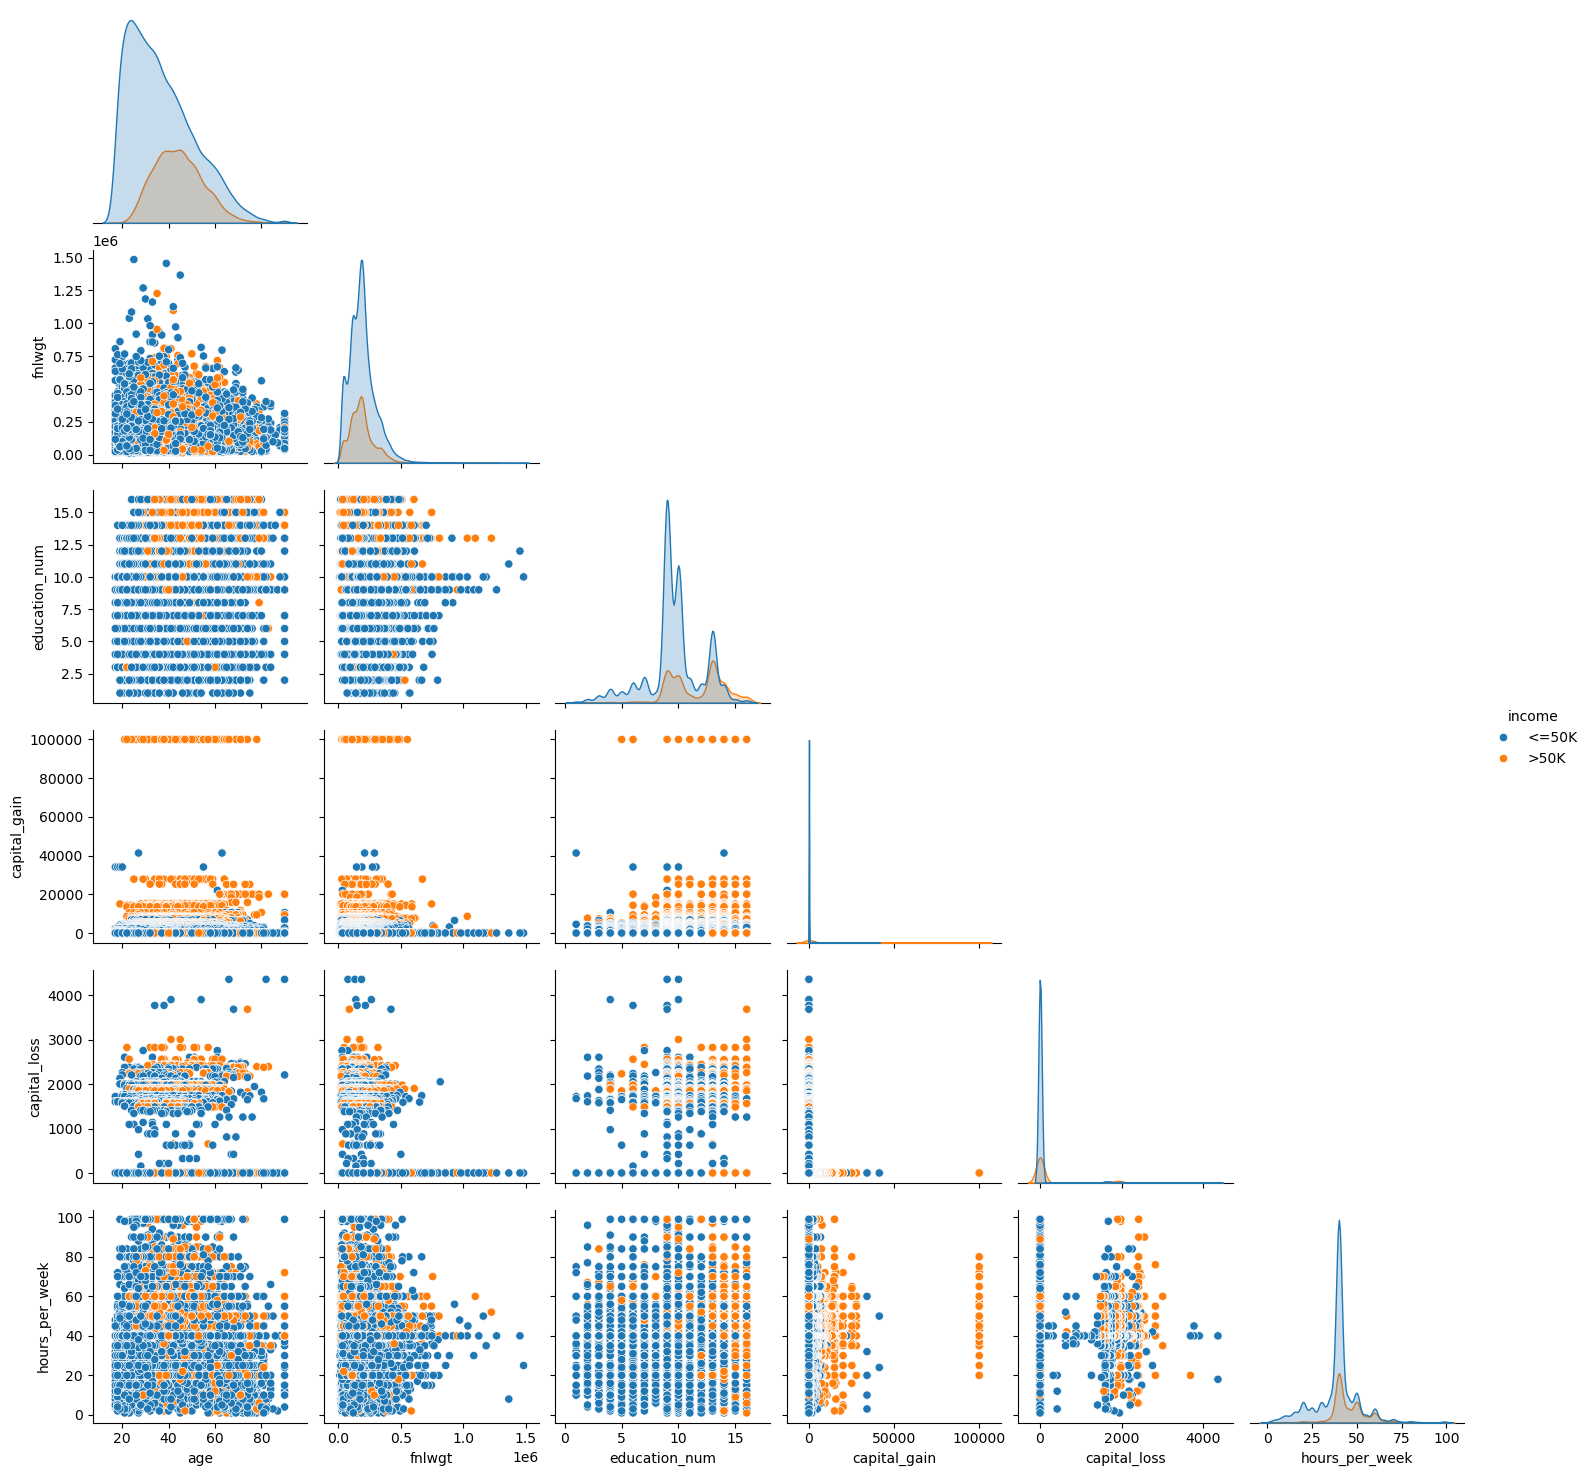

In [63]:
sns.pairplot(df, hue="income", corner=True);

## <font color='#4C8A2E'> <b>NaN Values</b><font color='black'>

In [65]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [66]:
print("Total number of NaN values:", df.isnull().sum().sum())
print("NaN values ​​are ", round((df.isnull().sum().sum() / len(df)) * 100, 3), "% of the data set.")

Total number of NaN values: 4261
NaN values ​​are  13.096 % of the data set.


In [67]:
df.dropna(inplace=True)

In [68]:
df.isnull().sum().sum()

0

## <font color='#4C8A2E'> <b>Outliers</b><font color='black'>

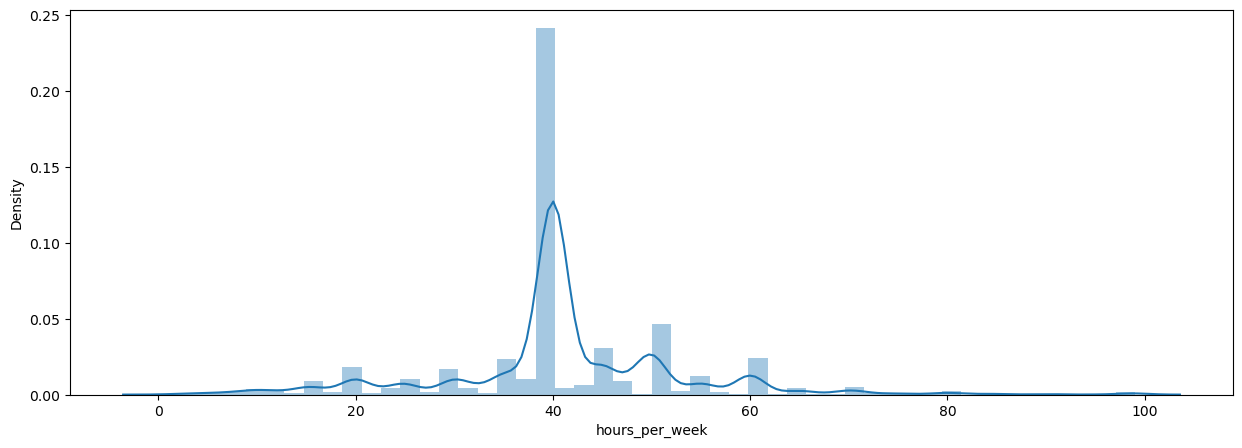

____________________________________________________________________________________________________
skewness in age column : 0.3323859714019703


In [70]:
# Doing univariate analysis on workours column
plt.figure(figsize = (15,5))
sns.distplot(df["hours_per_week"], kde = True)

plt.show()
print("_"*100)
print("skewness in age column :",df["hours_per_week"].skew());

In [71]:
df = df[~((df["hours_per_week"] > 72) | (df["hours_per_week"] < 20))]

In [72]:
df = df.drop(columns=["capital_gain", "capital_loss"])

In [73]:
def cap_outliers(df, lower_percentile=0.05, upper_percentile=0.95):
    for column in df.select_dtypes(include=np.number):  # Only apply to numeric columns
        lower_bound = df[column].quantile(lower_percentile)
        upper_bound = df[column].quantile(upper_percentile)
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

cap_outliers(df)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
3,54,Private,140359.0,7th-8th,6,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,<=50K
7,61,State-gov,88638.0,Doctorate,14,Never-married,Prof-specialty,Other-relative,White,Female,25,United-States,>50K


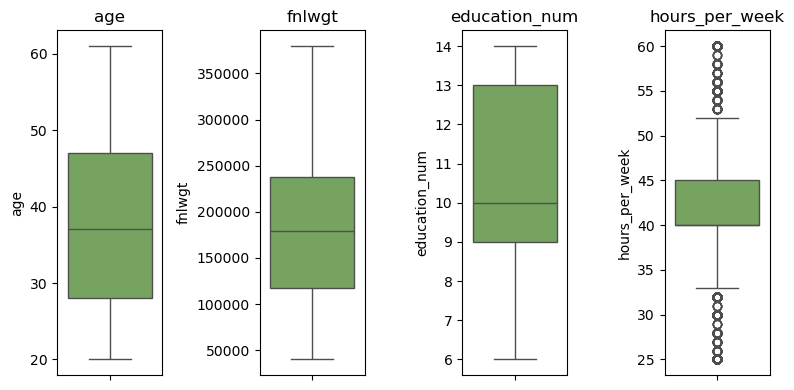

In [74]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;  
numeric_columns = df.select_dtypes(include=['number']).columns
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='#72B054')
    plt.title(col)

plt.tight_layout() 
plt.show()

## <font color='#4C8A2E'> <b>Feature Engineering</b><font color='black'>

In [76]:
df.drop(labels = ["fnlwgt"],axis = 1,inplace = True)

In [77]:
# Removing rows where 'Workclass' is 'Without-pay' and 'Never-worked'
df = df[(df["workclass"] != "Without-pay") & (df["workclass"] != "Never-worked")]

In [78]:
df["education"].replace(["11th", "9th", "7th-8th", "5th-6th", "10th", "1st-4th", "12th"], "School", inplace = True)

In [79]:
df["race"].replace(["Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"],"Others", inplace = True)

In [80]:
df["native_country"].loc[df["native_country"] != "United-States"] = "Others"

In [81]:
df["marital_status"] = df["marital_status"].replace({
    "Married-civ-spouse": "Married",
    "Married-spouse-absent": "Married",
    "Married-AF-spouse": "Married",
    "Separated": "Married",
    "Never-married": "Single",
    "Divorced": "Single",
    "Widowed": "Single"
})

# <font color='green'> <b>Data Pre-Processing</b><font color='black'>

In [83]:
df['income'] = df['income'].replace({'<=50K': 1, '>50K': 0})

In [84]:
df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})

In [85]:
df = pd.get_dummies(data=df, columns=["native_country", "workclass", "occupation", "race", "marital_status", "relationship"],drop_first=True)

# Finding Boolean columns
bool_cols = df.select_dtypes(include=[bool]).columns

# Converting Boolean columns to integers
df[bool_cols] = df[bool_cols].astype(int)

# Displaying the first 10 rows of the DataFrame
df.head(5)

,age,education,education_num,sex,hours_per_week,income,native_country_United-States,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Tech-support,occupation_Transport-moving,race_Others,race_White,marital_status_Single,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
3,54,School,6,1,40,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
4,41,Some-college,10,1,40,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5,34,HS-grad,9,1,45,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
6,38,School,6,0,40,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
7,61,Doctorate,14,1,25,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


## <font color='#4C8A2E'> <b>Train | Test Split</b><font color='black'>

In [87]:
df.income.value_counts()

# <=50 : 1
# >50 : 0

# Unbalanced data

income
1    21117
0     7283
Name: count, dtype: int64

In [88]:
X = df.drop(columns="income")
y = df.income

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

## <font color='#4C8A2E'> <b>Encoding</b><font color='black'>

In [91]:
# Ordered categories for Education
EducationOrder = ['Preschool', 'School', 'HS-grad','Some-college', 'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Prof-school', 'Doctorate']

In [92]:
encoder = OrdinalEncoder(categories=[EducationOrder])

In [93]:
# Fit and transform the encoder on the training data and create a new column with encoded values
X_train['Education_encoded'] = encoder.fit_transform(X_train[["education"]])
X_test['Education_encoded'] = encoder.transform(X_test[["education"]])

In [94]:
# Drop the 'Education' column
X_train = X_train.drop(columns=['education'])
X_test = X_test.drop(columns=['education'])

In [95]:
X_train.head()

,age,education_num,sex,hours_per_week,native_country_United-States,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Transport-moving,race_Others,race_White,marital_status_Single,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,Education_encoded
2246,39,9,0,40,1,0,1,0,0,0,...,0,0,1,1,1,0,0,0,0,2.0
9789,34,10,1,40,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,3.0
7541,40,14,0,46,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,7.0
26440,43,10,0,55,1,0,1,0,0,0,...,0,0,1,1,1,0,0,0,0,3.0
3245,23,10,1,40,1,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,3.0


In [96]:
X_test.head()

,age,education_num,sex,hours_per_week,native_country_United-States,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,occupation_Transport-moving,race_Others,race_White,marital_status_Single,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,Education_encoded
2339,37,10,0,55,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,3.0
18907,39,13,1,50,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,6.0
11994,22,10,0,25,1,0,1,0,0,0,...,1,0,1,1,0,0,1,0,0,3.0
19203,57,13,0,55,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,6.0
31706,33,9,1,41,1,0,1,0,0,0,...,0,0,1,1,1,0,0,0,0,2.0


# <font color='green'> <b>Implement Logistic Regression</b><font color='black'>

In [98]:
operations = [("scale", StandardScaler()), ("logistic", LogisticRegression())]

log_model = Pipeline(steps=operations)

log_model.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('logistic', LogisticRegression())])

In [99]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 827  630]
 [ 341 3882]]
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1457
           1       0.86      0.92      0.89      4223

    accuracy                           0.83      5680
   macro avg       0.78      0.74      0.76      5680
weighted avg       0.82      0.83      0.82      5680


Train_Set
[[ 3334  2492]
 [ 1405 15489]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      5826
           1       0.86      0.92      0.89     16894

    accuracy                           0.83     22720
   macro avg       0.78      0.74      0.76     22720
weighted avg       0.82      0.83      0.82     22720



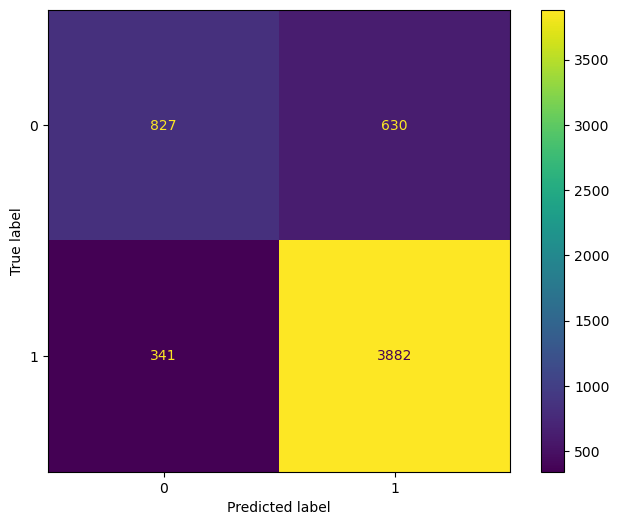

In [100]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.show()

In [101]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.827597
train_accuracy     0.828154
test_precision     0.860660
train_precision    0.861130
test_recall        0.916539
train_recall       0.916729
test_f1            0.887705
train_f1           0.888060
dtype: float64

## <font color='#4C8A2E'> <b>GridsearchCV</b><font color='black'>

In [103]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

cv = StratifiedKFold(n_splits = 10) 

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [104]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': None,
 'logistic__penalty': 'l1',
 'logistic__solver': 'saga'}

In [105]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, penalty='l1', solver='saga'))])

In [106]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 823  634]
 [ 338 3885]]
              precision    recall  f1-score   support

           0       0.71      0.56      0.63      1457
           1       0.86      0.92      0.89      4223

    accuracy                           0.83      5680
   macro avg       0.78      0.74      0.76      5680
weighted avg       0.82      0.83      0.82      5680


Train_Set
[[ 3309  2517]
 [ 1391 15503]]
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      5826
           1       0.86      0.92      0.89     16894

    accuracy                           0.83     22720
   macro avg       0.78      0.74      0.76     22720
weighted avg       0.82      0.83      0.82     22720



# <font color='green'> <b>K Nearest Neigbors (KNN)</b><font color='black'>

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 101)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
operations = [("scaler",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=5))]

In [110]:
pipe_model = Pipeline(steps=operations)

In [111]:
param_grid = [
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(1, 30),
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

In [112]:
knn_grid_model = GridSearchCV(pipe_model, param_grid, cv=5, scoring= "accuracy", return_train_score=True)

In [113]:
knn_grid_model.fit(X_train, y_train)

ValueError: 
All the 1160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
232 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'HS-grad'

--------------------------------------------------------------------------------
928 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Fatih YAVUZ\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Some-college'


In [ ]:
knn_grid_model.best_params_

In [ ]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

# <font color='green'> <b>Implement Support Vector Machine (SVC)</b><font color='black'>

# <font color='green'> <b>Final Model</b><font color='black'>

# <font color='green'> <b>Conclusion</b><font color='black'>

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |